In [5]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl


In [6]:
from keras import models
from keras import layers
from keras.optimizers import sgd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pylab 
%matplotlib inline
import time
import tensorflow as tf
tf.reset_default_graph()
import h5py
import numpy as np

Using TensorFlow backend.


In [7]:
def loadData():
    with h5py.File('data.h5','r') as hf:
        print('List of arrays in this file: \n', hf.keys())
        allTrain = hf.get('trainData')
        allTest = hf.get('testData')
        npTrain = np.array(allTrain)
        npTest = np.array(allTest)
        print('Shape of the array dataset_1: \n', npTrain.shape)
        print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

x_train, y_train, x_test, y_test = loadData()

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [8]:
# Normalize the x_train and x_test dataset
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train", x_train.shape, "y_train", y_train.shape, "x_test", x_test.shape, "y_test", y_test.shape)

x_train (200000, 784) y_train (200000,) x_test (17000, 784) y_test (17000,)


In [9]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, batch_size = 256, validation_split=0.1)

Train on 180000 samples, validate on 20000 samples
Epoch 1/30
180000/180000 [==============================] - 22s 124us/step - loss: 2.1674 - acc: 0.6460 - val_loss: 2.0410 - val_acc: 0.7019
Epoch 2/30
180000/180000 [==============================] - 3s 14us/step - loss: 1.9294 - acc: 0.7134 - val_loss: 1.8265 - val_acc: 0.7188
Epoch 3/30
180000/180000 [==============================] - 3s 15us/step - loss: 1.7343 - acc: 0.7271 - val_loss: 1.6505 - val_acc: 0.7345
Epoch 4/30
180000/180000 [==============================] - 3s 16us/step - loss: 1.5745 - acc: 0.7392 - val_loss: 1.5060 - val_acc: 0.7438
Epoch 5/30
180000/180000 [==============================] - 3s 16us/step - loss: 1.4432 - acc: 0.7485 - val_loss: 1.3871 - val_acc: 0.7522
Epoch 6/30
180000/180000 [==============================] - 3s 16us/step - loss: 1.3350 - acc: 0.7572 - val_loss: 1.2887 - val_acc: 0.7582
Epoch 7/30
180000/180000 [==============================] - 3s 15us/step - loss: 1.2454 - acc: 0.7635 - val_loss:

Keys:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


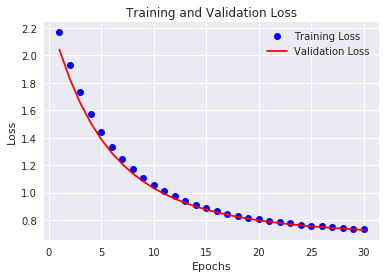

In [29]:
history_dict = history.history
print("Keys: ", history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc'])+1)

def plot_results(loss_values,val_loss_values, epochs, **kwargs):
  label1 = kwargs.pop('label1')
  plt.plot(epochs, loss_values, 'bo',label = label1)
  label2 = kwargs.pop('label2')
  plt.plot(epochs, val_loss_values, 'r',label = label2)
  title  = kwargs.pop('title')
  xlabel = kwargs.pop('xlabel')
  ylabel = kwargs.pop('ylabel')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()
  
plot_para = {'title': 'Training and Validation Loss', 'xlabel':'Epochs', 'ylabel': 'Loss', 'label1': 'Training Loss', 'label2': 'Validation Loss'}
plot_results(loss_values,val_loss_values, epochs, **plot_para) 

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


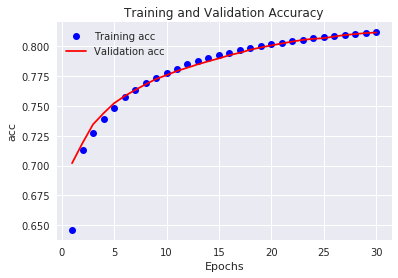

In [30]:
plot_para = {'title': 'Training and Validation Accuracy', 'xlabel':'Epochs', 'ylabel': 'acc', 'label1': 'Training acc', 'label2': 'Validation acc'}
plot_results(acc_values,val_acc_values, epochs, **plot_para) 

In [31]:
results = model.evaluate(x_test, y_test)
print (results)

17000/17000 [==============================] - 1s 39us/step
[0.6542630269948174, 0.8342941176470589]
